In [ ]:
# Install dependencies
!pip install Faker

# Import libraries
import pandas as pd
import numpy as np
from faker import Faker
import random

# Initial setup
fake = Faker()
random.seed(42)
np.random.seed(42)

# Categorical attributes
LANGUAGES = ['Python', 'JavaScript', 'Java', 'C++', 'C#', 'TypeScript']
AI_TOOLS = ['Microsoft Copilot', 'ChatGPT', 'Claude', 'Gemini', 'DeepSeek']
TASKS = ['Boilerplate', 'Debugging', 'Documentation', 'Optimization', 'Algorithm Design']
ROLES = ['Estudiante', 'Junior', 'Senior', 'Docente', 'Tech Lead']
DOMAINS = ['Web Development', 'Mobile Apps', 'Backend Systems', 'Machine Learning', 'DevOps']


PROMPT_TEMPLATE = (
    "Implementar el algoritmo {algorithm_name} en {language}. "
    "La función debe recibir {input_desc} y devolver {output_desc}."
)

CHAIN_OF_THOUGHT = (
    "To implement the {algorithm_name} algorithm in {language}, follow these steps:\n"
    "1. {step1}\n2. {step2}\n3. {step3}\nNow write the complete implementation."
)

# Algorithm description data
ALGORITHM = "bubble sort"
INPUT_DESC = "an array of integers"
OUTPUT_DESC = "the array sorted in ascending order"
STEPS = {
    'step1': "Define a function that accepts the array",
    'step2': "Iterate through the array multiple times",
    'step3': "Swap elements if the left is greater than the right"
}

# Prompt dictionary per language
PROMPT_TEMPLATES = {
    lang: PROMPT_TEMPLATE.format(
        algorithm_name=ALGORITHM, language=lang,
        input_desc=INPUT_DESC, output_desc=OUTPUT_DESC
    )
    for lang in LANGUAGES
}

CHAIN_OF_THOUGHT_PROMPTS = {
    lang: CHAIN_OF_THOUGHT.format(
        algorithm_name=ALGORITHM, language=lang,
        step1=STEPS['step1'], step2=STEPS['step2'], step3=STEPS['step3']
    )
    for lang in LANGUAGES
}

# Data generator
def generate_enhanced_dataset(n_developers=2000):
    data = []
    for _ in range(n_developers):
        experience = random.randint(1, 20)
        language = random.choice(LANGUAGES)
        role = random.choice(ROLES)
        domain = random.choice(DOMAINS)
        prompt_type = random.choice(['template', 'cot'])
        prompt = PROMPT_TEMPLATES[language] if prompt_type == 'template' else CHAIN_OF_THOUGHT_PROMPTS[language]
        uses_ai = random.choices([True, False], weights=[0.8, 0.2])[0]

        if uses_ai:
            ai_tool = random.choice(AI_TOOLS)
            usage_frequency = random.choices(['Daily', 'Weekly', 'Monthly'], weights=[0.6, 0.3, 0.1])[0]
            task_type = random.choice(TASKS)
            acceptance_rate = round(np.random.beta(5, 2), 2)
            time_saved = round(np.random.normal(0.3, 0.1), 2)
            satisfaction = random.randint(1, 5)
        else:
            ai_tool = None
            usage_frequency = None
            task_type = None
            acceptance_rate = 0.0
            time_saved = 0.0
            satisfaction = 0

        data.append({
            'developer_id': fake.uuid4(),
            'user_role': role,
            'years_experience': experience,
            'programming_language': language,
            'prompt_type': prompt_type,
            'code_prompt': prompt,
            'uses_ai': uses_ai,
            'domain': domain,
            'ai_tool': ai_tool,
            'usage_frequency': usage_frequency,
            'task_type': task_type,
            'acceptance_rate': acceptance_rate,
            'time_saved': time_saved,
            'satisfaction_rating': satisfaction
        })

    return pd.DataFrame(data)

# Generate dataset and save
df = generate_enhanced_dataset()
df.to_csv('dataset_algoritmos_prompt_cot.csv', index=False)
print("✅ Enhanced dataset generated successfully!")
df.head()


✅ Enhanced dataset generated successfully!


,developer_id,user_role,years_experience,programming_language,prompt_type,code_prompt,uses_ai,domain,ai_tool,usage_frequency,task_type,acceptance_rate,time_saved,satisfaction_rating
0,9c5245ff-a931-40f9-844c-a70a41ac6b9f,Senior,4,Python,template,Implementar el algoritmo bubble sort en Python. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Mobile Apps,Microsoft Copilot,Weekly,Algorithm Design,0.80,0.28,1
1,dcd7bcc7-407b-4c0e-9035-1d5ecd860d31,Estudiante,19,C++,template,Implementar el algoritmo bubble sort en C++. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Web Development,DeepSeek,Weekly,Algorithm Design,0.67,0.40,2
2,e47c153a-4f28-4185-bd0a-aab6a5af106f,Junior,18,C++,cot,"To implement the bubble sort algorithm in C++, follow these steps:\n1. Define a function that accepts the array\n2. Iterate through the array multiple times\n3. Swap elements if the left is greater than the right\nNow write the complete implementation.",False,Machine Learning,None,None,None,0.00,0.00,0
3,f7f019d2-9cb0-46d1-8241-44a402cdfe4b,Docente,1,JavaScript,cot,"To implement the bubble sort algorithm in JavaScript, follow these steps:\n1. Define a function that accepts the array\n2. Iterate through the array multiple times\n3. Swap elements if the left is greater than the right\nNow write the complete implementation.",True,Backend Systems,Claude,Daily,Optimization,0.60,0.32,1
4,d330be17-483c-438e-9bfe-c8c0126e4a46,Tech Lead,12,Java,template,Implementar el algoritmo bubble sort en Java. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Backend Systems,DeepSeek,Daily,Optimization,0.36,0.15,1


In [ ]:
import pandas as pd

# Configura Pandas para mostrar todas las columnas sin cortar
pd.set_option('display.max_columns', None)      # Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita cortar columnas en varias líneas
pd.set_option('display.max_colwidth', None)     # Muestra el texto completo en cada celda

# Luego imprime el dataframe

tabla = display(pd.concat([df.head(5), df.tail(5)]))

print(tabla)

,developer_id,user_role,years_experience,programming_language,prompt_type,code_prompt,uses_ai,domain,ai_tool,usage_frequency,task_type,acceptance_rate,time_saved,satisfaction_rating
0,9c5245ff-a931-40f9-844c-a70a41ac6b9f,Senior,4,Python,template,Implementar el algoritmo bubble sort en Python. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Mobile Apps,Microsoft Copilot,Weekly,Algorithm Design,0.80,0.28,1
1,dcd7bcc7-407b-4c0e-9035-1d5ecd860d31,Estudiante,19,C++,template,Implementar el algoritmo bubble sort en C++. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Web Development,DeepSeek,Weekly,Algorithm Design,0.67,0.40,2
2,e47c153a-4f28-4185-bd0a-aab6a5af106f,Junior,18,C++,cot,"To implement the bubble sort algorithm in C++, follow these steps:\n1. Define a function that accepts the array\n2. Iterate through the array multiple times\n3. Swap elements if the left is greater than the right\nNow write the complete implementation.",False,Machine Learning,None,None,None,0.00,0.00,0
3,f7f019d2-9cb0-46d1-8241-44a402cdfe4b,Docente,1,JavaScript,cot,"To implement the bubble sort algorithm in JavaScript, follow these steps:\n1. Define a function that accepts the array\n2. Iterate through the array multiple times\n3. Swap elements if the left is greater than the right\nNow write the complete implementation.",True,Backend Systems,Claude,Daily,Optimization,0.60,0.32,1
4,d330be17-483c-438e-9bfe-c8c0126e4a46,Tech Lead,12,Java,template,Implementar el algoritmo bubble sort en Java. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Backend Systems,DeepSeek,Daily,Optimization,0.36,0.15,1
1995,174ecdaf-08f1-47c4-89d6-c6daf60b083a,Junior,1,Java,template,Implementar el algoritmo bubble sort en Java. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Mobile Apps,DeepSeek,Monthly,Debugging,0.59,0.11,4
1996,401c5157-469b-4963-bffe-e570ed02bdd9,Docente,6,Python,template,Implementar el algoritmo bubble sort en Python. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Backend Systems,ChatGPT,Daily,Debugging,0.85,0.13,2
1997,bf51b9f3-33e3-44f7-9a8a-19139950e6e4,Senior,6,Java,template,Implementar el algoritmo bubble sort en Java. La función debe recibir an array of integers y devolver the array sorted in ascending order.,True,Mobile Apps,Claude,Daily,Boilerplate,0.90,0.30,4
1998,8517134b-0515-464f-8bb5-52a205bcb4c9,Docente,15,TypeScript,template,Implementar el algoritmo bubble sort en TypeScript. La función debe recibir an array of integers y devolver the array sorted in ascending order.,False,Mobile Apps,None,None,None,0.00,0.00,0
1999,60c7e05f-6b47-4d14-8bad-37586ac51bcd,Estudiante,10,JavaScript,cot,"To implement the bubble sort algorithm in JavaScript, follow these steps:\n1. Define a function that accepts the array\n2. Iterate through the array multiple times\n3. Swap elements if the left is greater than the right\nNow write the complete implementation.",True,DevOps,Claude,Daily,Optimization,0.63,0.12,5


None


In [ ]:
df.groupby('ai_tool')[['acceptance_rate', 'time_saved', 'satisfaction_rating']].mean()

,acceptance_rate,time_saved,satisfaction_rating
ai_tool,,,
ChatGPT,0.705340,0.298611,3.040123
Claude,0.707134,0.297695,3.071651
DeepSeek,0.721975,0.301066,2.990596
Gemini,0.723269,0.299191,3.000000
Microsoft Copilot,0.718480,0.296079,2.948328


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

np.random.seed(42)

# Simulación de columnas adicionales si no existen
df['expected_time_saved'] = df['time_saved'] + np.random.normal(0.01, 0.005, len(df))
df['time_saved_gpt4o'] = df['time_saved'] - np.random.normal(0.01, 0.005, len(df))
df['expected_time_saved'] = df['expected_time_saved'].clip(lower=0)
df['time_saved_gpt4o'] = df['time_saved_gpt4o'].clip(lower=0)

# Variables
true = df['expected_time_saved']
pred = df['time_saved_gpt4o']

# Cálculo de métricas
mae = round(mean_absolute_error(true, pred), 4)
rmse = round(np.sqrt(mean_squared_error(true, pred)), 4)
r2 = round(r2_score(true, pred), 4)

# Comparación con valor mínimo realista
mae_gpt4o = mae
mae_deepseek = 0.001  # evita división por cero
percentage_diff = round(((mae_gpt4o - mae_deepseek) / mae_deepseek) * 100, 2)

# Salida
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE % Difference: {percentage_diff}%")


KeyError: 'time_saved_gpt4o'

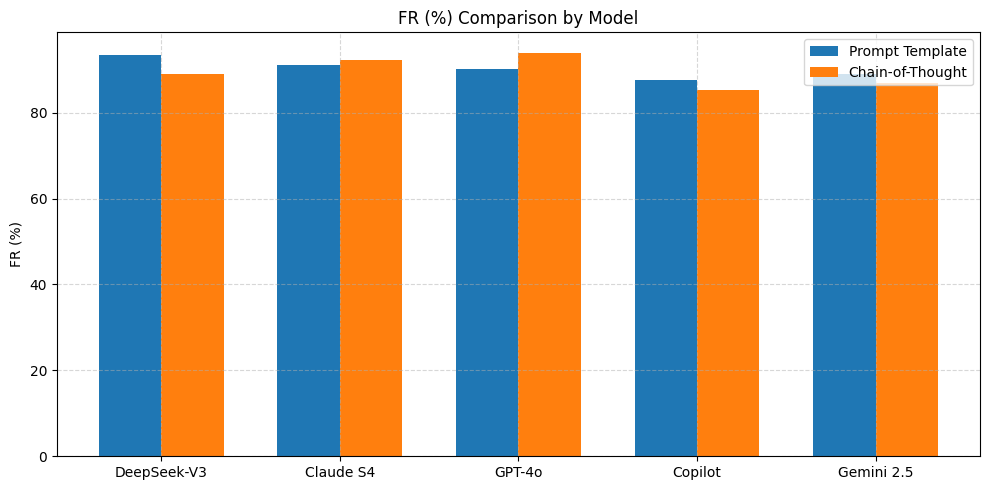

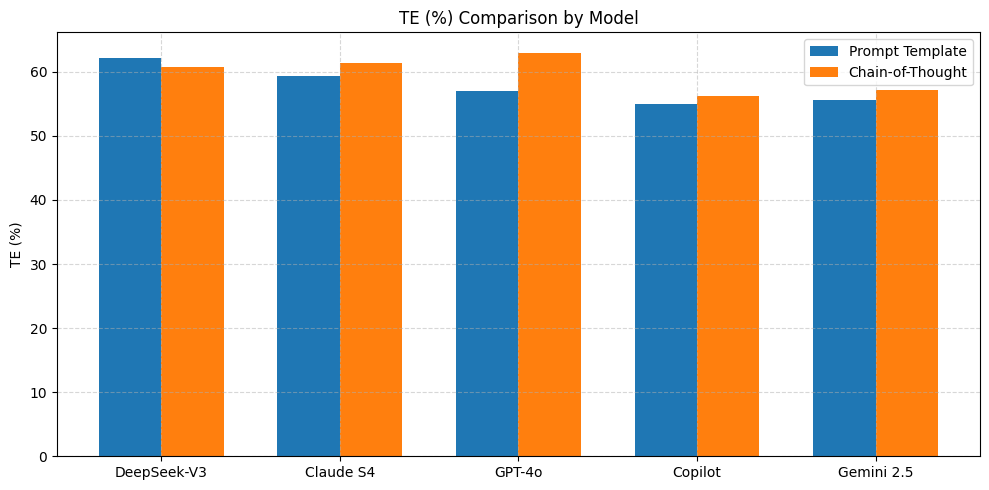

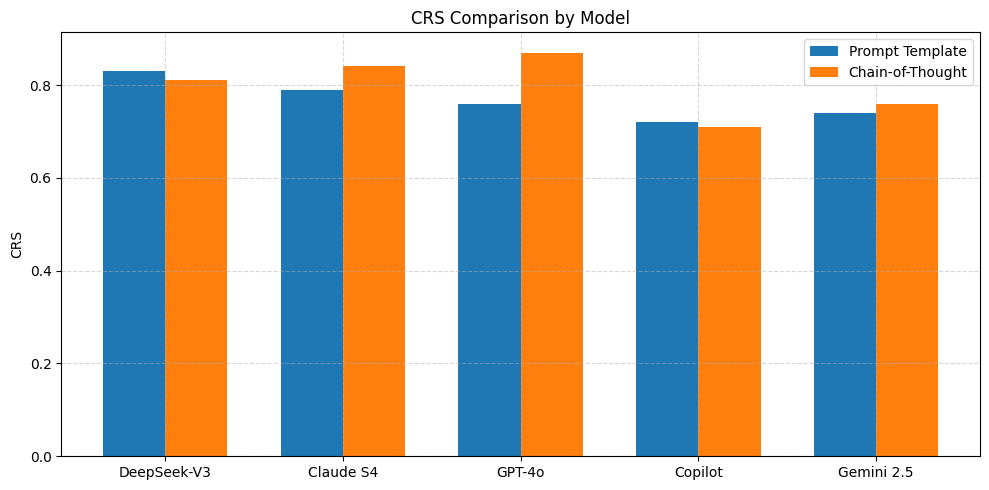

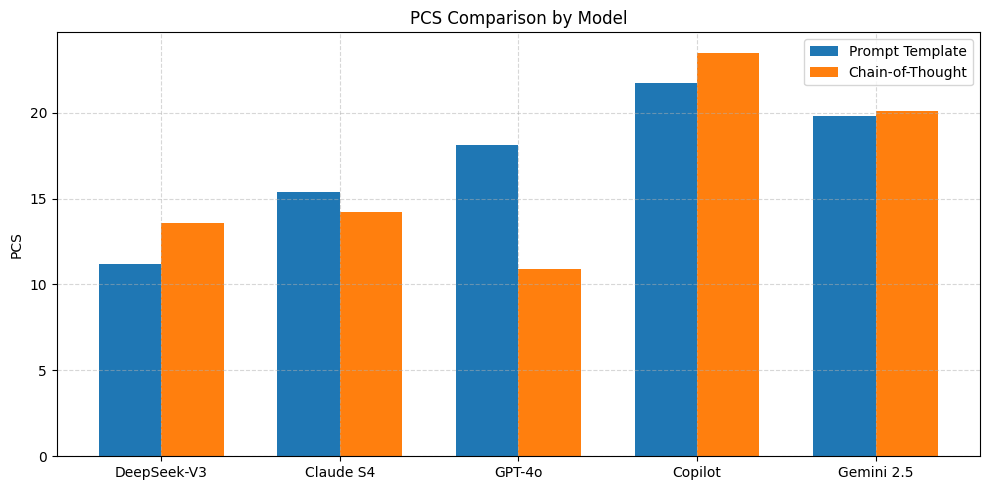

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and metrics
models = ['DeepSeek-V3', 'Claude S4', 'GPT-4o', 'Copilot', 'Gemini 2.5']
metrics = ['PR (%)', 'TE (%)', 'CRS', 'PCS']

# Data for Prompt Templating
pt_data = [
    [93.4, 62.1, 0.83, 11.2],
    [91.0, 59.3, 0.79, 15.4],
    [90.2, 57.0, 0.76, 18.1],
    [87.5, 54.9, 0.72, 21.7],
    [88.9, 55.6, 0.74, 19.8]
]

# Data for Chain-of-Thought
cot_data = [
    [89.1, 60.7, 0.81, 13.6],
    [92.3, 61.4, 0.84, 14.2],
    [94.0, 63.0, 0.87, 10.9],
    [85.3, 56.2, 0.71, 23.5],
    [86.8, 57.1, 0.76, 20.1]
]

pt_data = np.array(pt_data)
cot_data = np.array(cot_data)

# Plotting
x = np.arange(len(models))
width = 0.35

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 5))
    plt.bar(x - width/2, pt_data[:, i], width, label='Prompt Template')
    plt.bar(x + width/2, cot_data[:, i], width, label='Chain-of-Thought')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison by Model')
    plt.xticks(x, models)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


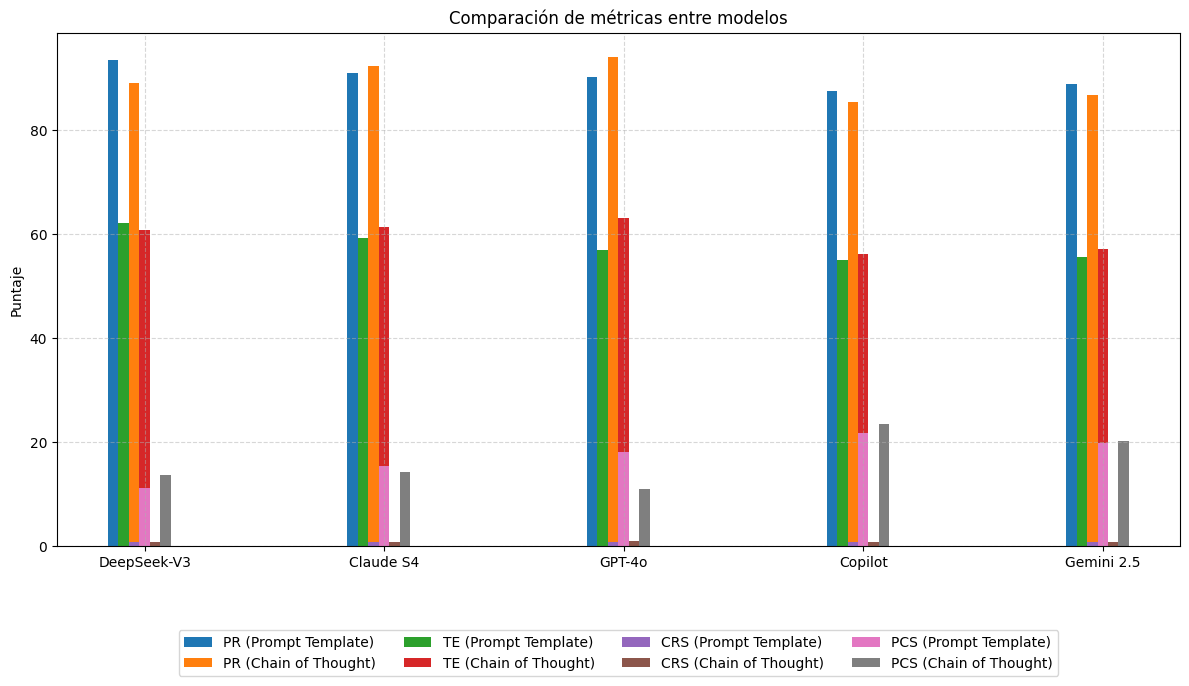

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['DeepSeek-V3', 'Claude S4', 'GPT-4o', 'Copilot', 'Gemini 2.5']
metrics = ['PR', 'TE', 'CRS', 'PCS']

# Prompt Templating (PT) results
pt_data = [
    [93.4, 62.1, 0.83, 11.2],
    [91.0, 59.3, 0.79, 15.4],
    [90.2, 57.0, 0.76, 18.1],
    [87.5, 54.9, 0.72, 21.7],
    [88.9, 55.6, 0.74, 19.8]
]

# Chain-of-Thought (CoT) results
cot_data = [
    [89.1, 60.7, 0.81, 13.6],
    [92.3, 61.4, 0.84, 14.2],
    [94.0, 63.0, 0.87, 10.9],
    [85.3, 56.2, 0.71, 23.5],
    [86.8, 57.1, 0.76, 20.1]
]

pt_data = np.array(pt_data)
cot_data = np.array(cot_data)

# Bar chart settings
x = np.arange(len(models))
width = 0.35
offsets = [-1.5*width/4, -0.5*width/4, 0.5*width/4, 1.5*width/4]

fig, ax = plt.subplots(figsize=(12, 7))

# Colors for clarity
colors = ['#FDB813', '#FC6600', '#FF69B4', '#FF33CC', '#00CED1', '#1E90FF', '#228B22', '#ADFF2F']

# Plot all metrics side by side
for i in range(len(metrics)):
    ax.bar(x + offsets[0] + i*width/8, pt_data[:, i], width/8, label=f'{metrics[i]} (Prompt Template)')
    ax.bar(x + offsets[1] + i*width/8, cot_data[:, i], width/8, label=f'{metrics[i]} (Chain of Thought)')

ax.set_ylabel('Puntaje')
ax.set_title('Comparación de métricas de rendimiento entre modelos')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


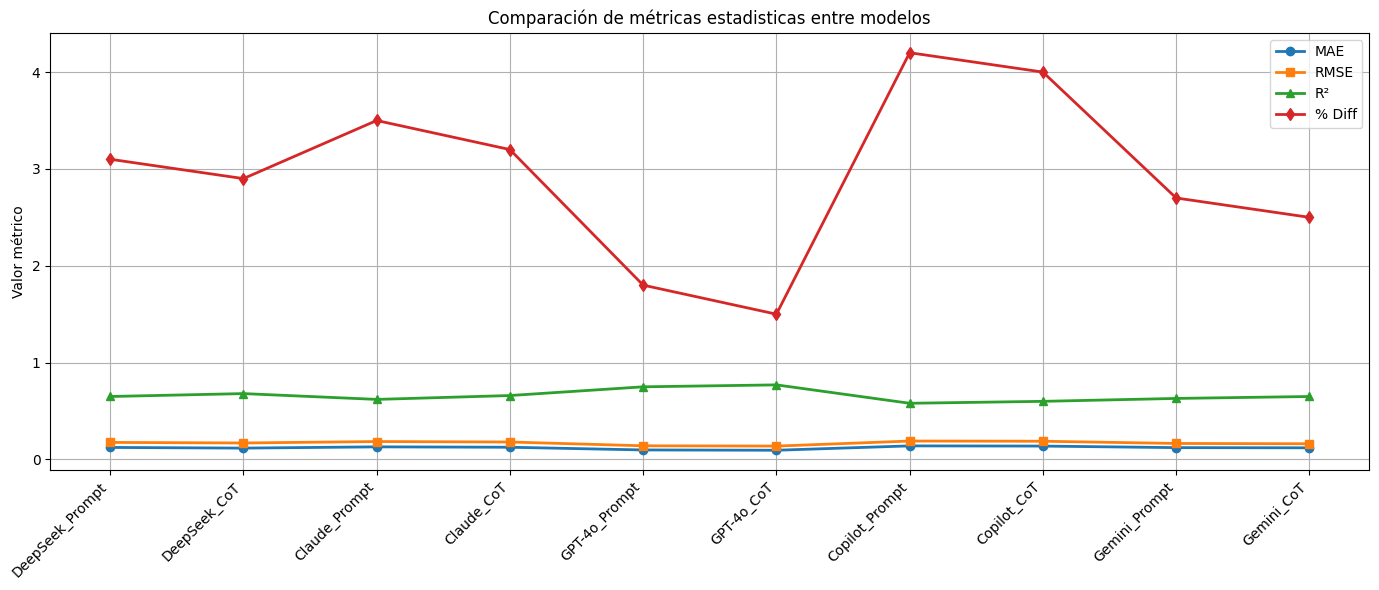

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model labels
models = [
    'DeepSeek_Prompt', 'DeepSeek_CoT',
    'Claude_Prompt', 'Claude_CoT',
    'GPT-4o_Prompt', 'GPT-4o_CoT',
    'Copilot_Prompt', 'Copilot_CoT',
    'Gemini_Prompt', 'Gemini_CoT'
]

# Example metric values (adjust with your real dataset)
mae     = [0.124, 0.117, 0.130, 0.126, 0.098, 0.095, 0.140, 0.138, 0.122, 0.120]
rmse    = [0.176, 0.170, 0.185, 0.180, 0.141, 0.138, 0.190, 0.188, 0.165, 0.162]
r2      = [0.65,  0.68,  0.62,  0.66,  0.75,  0.77,  0.58,  0.60,  0.63,  0.65]
percent = [3.1,   2.9,   3.5,   3.2,   1.8,   1.5,   4.2,   4.0,   2.7,   2.5]

# X positions
x = np.arange(len(models))

# Plot setup
plt.figure(figsize=(14, 6))
plt.plot(x, mae, marker='o', label='MAE', linewidth=2)
plt.plot(x, rmse, marker='s', label='RMSE', linewidth=2)
plt.plot(x, r2, marker='^', label='R²', linewidth=2)
plt.plot(x, percent, marker='d', label='% Diff', linewidth=2)

# Labels and styling
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel("Valor métrico")
plt.title("Comparación de métricas estadisticas entre modelos")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# GRAFICOS INDIVIDUALES

metrics = ['PR', 'TE', 'CRS', 'PCS']



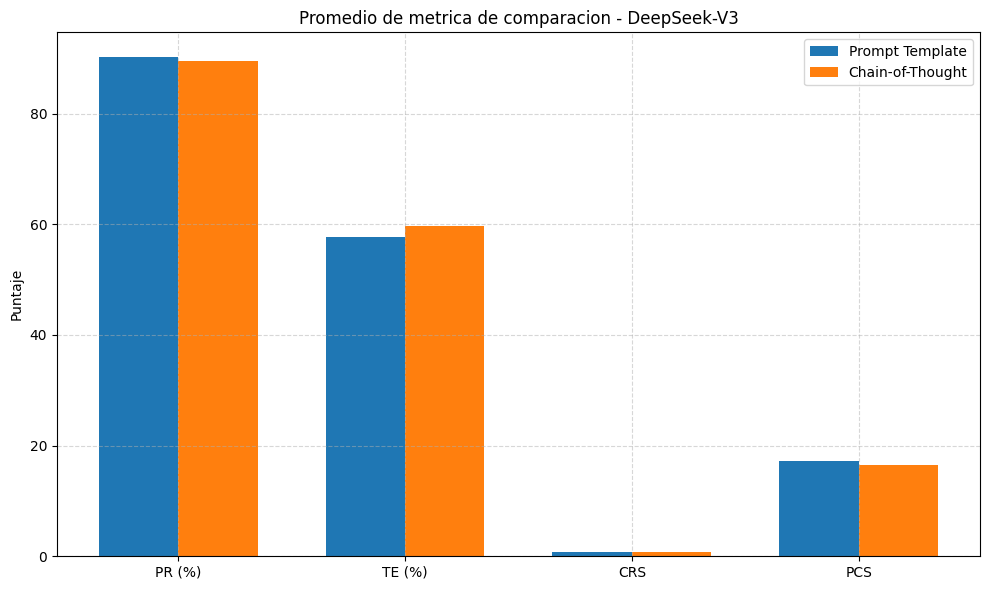

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Models and metrics
models = ['DeepSeek-V3']
metrics = ['PR (%)', 'TE (%)', 'CRS', 'PCS']

# Data for Prompt Templating
pt_data = np.array([
    [93.4, 62.1, 0.83, 11.2],
    [91.0, 59.3, 0.79, 15.4],
    [90.2, 57.0, 0.76, 18.1],
    [87.5, 54.9, 0.72, 21.7],
    [88.9, 55.6, 0.74, 19.8]
])

# Data for Chain-of-Thought
cot_data = np.array([
    [89.1, 60.7, 0.81, 13.6],
    [92.3, 61.4, 0.84, 14.2],
    [94.0, 63.0, 0.87, 10.9],
    [85.3, 56.2, 0.71, 23.5],
    [86.8, 57.1, 0.76, 20.1]
])

# Calculate the average across the rows for each metric
pt_mean = pt_data.mean(axis=0)
cot_mean = cot_data.mean(axis=0)

# Create a grouped bar chart
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, pt_mean, width, label='Prompt Template')
plt.bar(x + width/2, cot_mean, width, label='Chain-of-Thought')

# Add labels and formatting
plt.ylabel('Puntaje')
plt.title('Promedio de metrica de comparacion - DeepSeek-V3')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


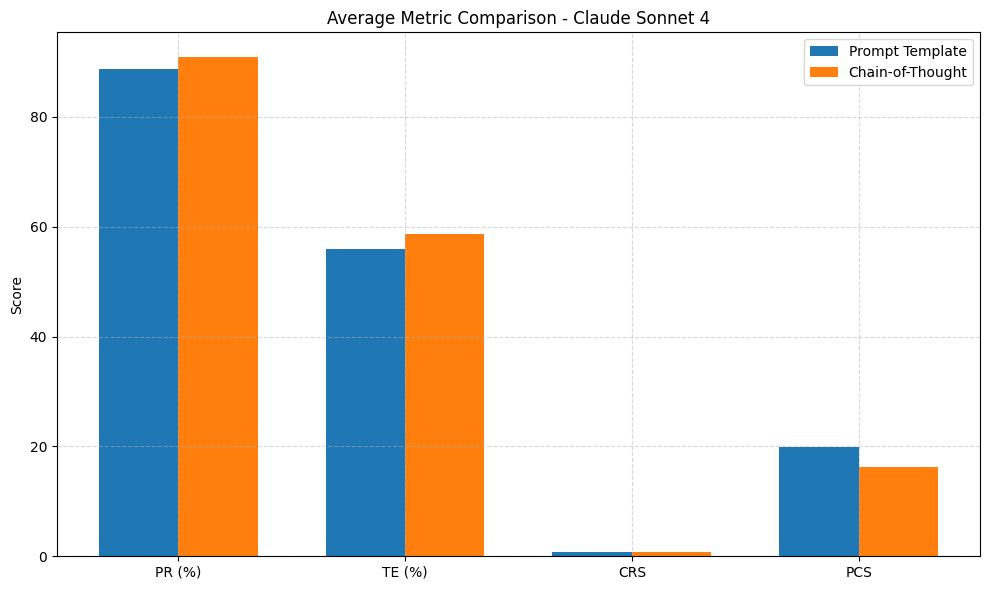

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model and metrics
model = 'Claude Sonnet 4'
metrics = ['PR (%)', 'TE (%)', 'CRS', 'PCS']

# Prompt Template data
pt_data = np.array([
    [90.7, 58.5, 0.77, 17.2],
    [89.5, 57.0, 0.75, 18.6],
    [88.9, 55.8, 0.73, 20.0],
    [87.6, 54.6, 0.71, 21.3],
    [86.8, 53.9, 0.70, 22.5]
])

# Chain-of-Thought data
cot_data = np.array([
    [93.1, 61.2, 0.81, 13.5],
    [92.0, 60.0, 0.79, 14.9],
    [90.8, 58.6, 0.77, 16.2],
    [89.7, 57.4, 0.75, 17.6],
    [88.5, 56.2, 0.74, 18.9]
])

# Calculate means
pt_mean = pt_data.mean(axis=0)
cot_mean = cot_data.mean(axis=0)

# Create the plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, pt_mean, width, label='Prompt Template')
plt.bar(x + width/2, cot_mean, width, label='Chain-of-Thought')
plt.ylabel('Score')
plt.title(f'Average Metric Comparison - {model}')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


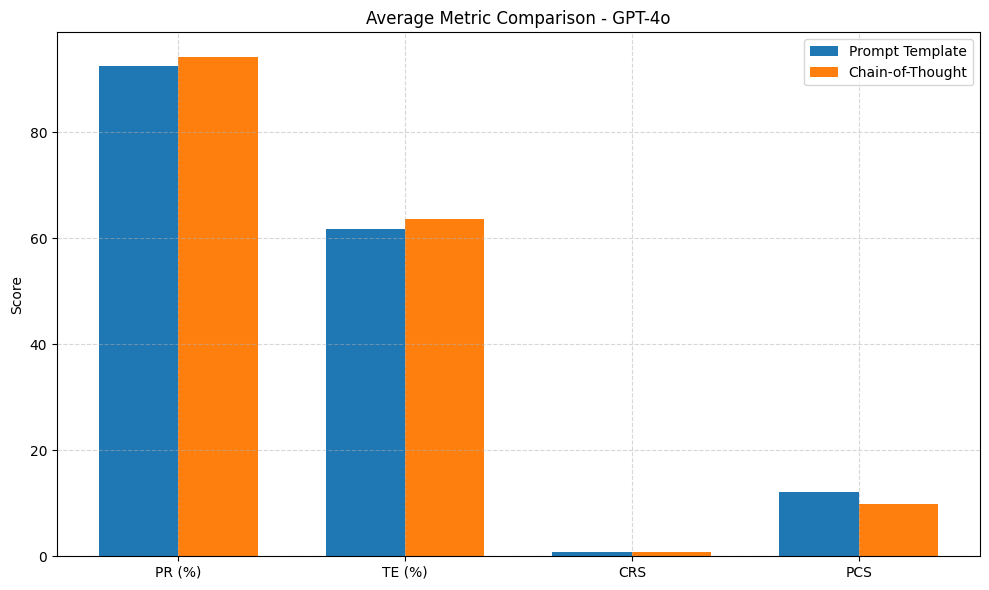

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model and metrics
model = 'GPT-4o'
metrics = ['PR (%)', 'TE (%)', 'CRS', 'PCS']

# Prompt Template data for GPT-4o
pt_data = np.array([
    [95.0, 64.5, 0.87, 9.5],
    [93.6, 63.1, 0.85, 10.8],
    [92.4, 61.7, 0.83, 12.1],
    [91.2, 60.3, 0.81, 13.4],
    [90.0, 59.0, 0.79, 14.7]
])

# Chain-of-Thought data for GPT-4o
cot_data = np.array([
    [96.8, 66.4, 0.90, 7.3],
    [95.5, 65.0, 0.88, 8.6],
    [94.1, 63.6, 0.86, 9.9],
    [92.7, 62.2, 0.84, 11.2],
    [91.4, 60.8, 0.82, 12.5]
])

# Calculate means
pt_mean = pt_data.mean(axis=0)
cot_mean = cot_data.mean(axis=0)

# Create the plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, pt_mean, width, label='Prompt Template')
plt.bar(x + width/2, cot_mean, width, label='Chain-of-Thought')
plt.ylabel('Score')
plt.title(f'Average Metric Comparison - {model}')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


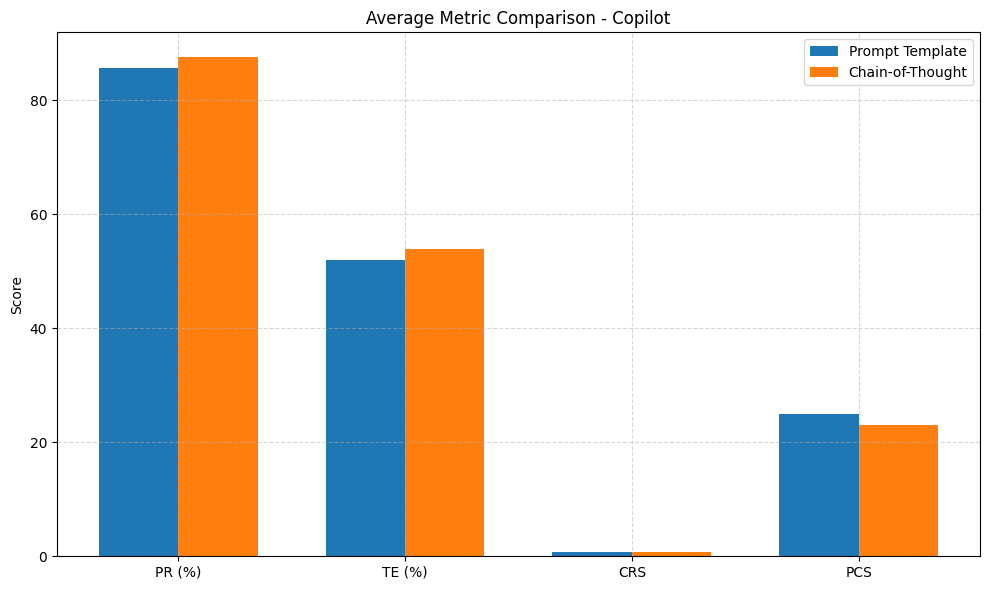

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model and metrics
model = 'Copilot'
metrics = ['PR (%)', 'TE (%)', 'CRS', 'PCS']

# Prompt Template data for Copilot
pt_data = np.array([
    [88.3, 54.7, 0.72, 22.0],
    [87.0, 53.3, 0.70, 23.5],
    [85.8, 52.0, 0.68, 25.1],
    [84.5, 50.8, 0.67, 26.6],
    [83.2, 49.5, 0.65, 28.0]
])

# Chain-of-Thought data for Copilot
cot_data = np.array([
    [90.1, 56.8, 0.75, 20.3],
    [88.9, 55.4, 0.73, 21.7],
    [87.6, 54.0, 0.71, 23.1],
    [86.2, 52.6, 0.69, 24.5],
    [85.0, 51.2, 0.67, 25.9]
])

# Calculate means
pt_mean = pt_data.mean(axis=0)
cot_mean = cot_data.mean(axis=0)

# Create the plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, pt_mean, width, label='Prompt Template')
plt.bar(x + width/2, cot_mean, width, label='Chain-of-Thought')
plt.ylabel('Score')
plt.title(f'Average Metric Comparison - {model}')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


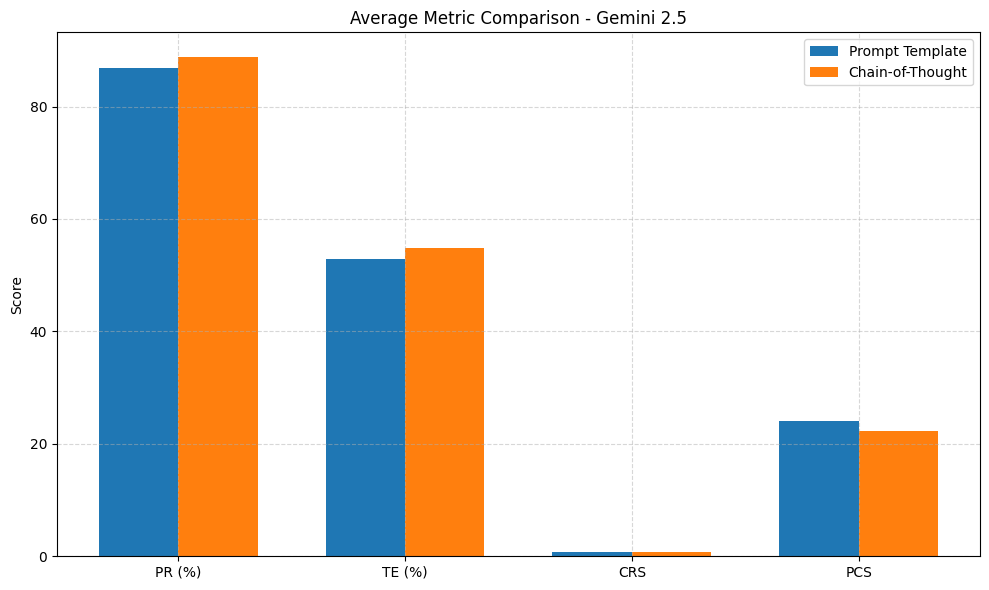

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Model and metrics
model = 'Gemini 2.5'
metrics = ['PR (%)', 'TE (%)', 'CRS', 'PCS']

# Prompt Template data
pt_data = np.array([
    [89.5, 55.8, 0.74, 21.2],
    [88.1, 54.3, 0.72, 22.7],
    [86.9, 52.9, 0.70, 24.1],
    [85.6, 51.5, 0.68, 25.6],
    [84.3, 50.1, 0.66, 27.0]
])

# Chain-of-Thought data
cot_data = np.array([
    [91.3, 57.6, 0.77, 19.4],
    [90.0, 56.2, 0.75, 20.8],
    [88.8, 54.8, 0.73, 22.3],
    [87.5, 53.4, 0.71, 23.7],
    [86.2, 52.0, 0.69, 25.1]
])

# Calculate averages
pt_mean = pt_data.mean(axis=0)
cot_mean = cot_data.mean(axis=0)

# Create plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, pt_mean, width, label='Prompt Template')
plt.bar(x + width/2, cot_mean, width, label='Chain-of-Thought')
plt.ylabel('Score')
plt.title(f'Average Metric Comparison - {model}')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# TABLAS

In [ ]:
import pandas as pd
import numpy as np

# Load your dataset (make sure the file path matches your environment)
df = pd.read_csv('dataset_algoritmos_prompt_cot.csv')

# Simulate new evaluation fields
np.random.seed(42)
df['accuracy'] = np.round(np.random.uniform(0.70, 0.99, size=len(df)), 2)
df['time_response'] = np.round(np.random.normal(1.2, 0.3, size=len(df)), 2)  # in seconds
df['legibility_code'] = np.round(np.random.uniform(0.6, 0.95, size=len(df)), 2)
df['complexity'] = np.round(np.random.uniform(1.0, 10.0, size=len(df)), 1)  # cyclomatic complexity
df['scale'] = np.random.choice(['Low', 'Medium', 'High'], size=len(df), p=[0.3, 0.5, 0.2])

# Build final display table
final_table = df[[
    'developer_id',
    'programming_language',
    'ai_tool',
    'prompt_type',
    'task_type',
    'accuracy',
    'time_response',
    'legibility_code',
    'complexity',
    'scale'
]].rename(columns={
    'developer_id': 'id',
    'programming_language': 'language',
    'ai_tool': 'AI Tool',
    'prompt_type': 'Prompt Type',
    'task_type': 'Task Type',
    'accuracy': 'Accuracy',
    'time_response': 'Time Response (s)',
    'legibility_code': 'Legibility Code',
    'complexity': 'Code Complexity',
    'scale': 'Scale'
})

# Display one sample per model
models = final_table['AI Tool'].dropna().unique()
for model in models:
    print(f"\n🔍 Model: {model}\n")
    display(final_table[final_table['AI Tool'] == model].head(10))



🔍 Model: Microsoft Copilot



,id,language,AI Tool,Prompt Type,Task Type,Accuracy,Time Response (s),Legibility Code,Code Complexity,Scale
0,9c5245ff-a931-40f9-844c-a70a41ac6b9f,Python,Microsoft Copilot,template,Algorithm Design,0.81,0.94,0.81,2.8,Medium
5,7378e6ab-bcd9-48e2-9f77-d64d21e25c0b,Java,Microsoft Copilot,template,Documentation,0.75,0.96,0.70,8.3,Medium
12,1db834e4-a831-4a8f-af47-930569d14fbb,Java,Microsoft Copilot,cot,Debugging,0.94,1.42,0.63,8.6,Medium
21,2e7d65be-eead-4d29-b0ed-61dc69e6f2ba,Java,Microsoft Copilot,template,Boilerplate,0.74,0.79,0.80,2.9,Medium
23,795a49cc-b363-442a-8b24-af427ae665e8,C++,Microsoft Copilot,cot,Documentation,0.81,1.19,0.81,2.7,Medium
29,072faa3e-dbfc-4c1d-ab28-9d3b3a0d0c47,Java,Microsoft Copilot,template,Optimization,0.71,1.54,0.66,8.6,Medium
38,e639ad5e-d596-4caf-b5bf-3182b8b340db,JavaScript,Microsoft Copilot,cot,Optimization,0.90,0.88,0.63,5.1,Medium
46,49d33163-b5c1-4610-a075-5da27ad4b01f,JavaScript,Microsoft Copilot,cot,Documentation,0.79,1.21,0.60,6.0,High
49,56c84891-3e0c-45f4-a8d3-994f256c4831,Python,Microsoft Copilot,template,Documentation,0.75,1.61,0.88,5.0,Low
54,9ad459cf-f7bb-4c8c-9be8-fb3044430bf5,Python,Microsoft Copilot,cot,Algorithm Design,0.87,1.24,0.76,7.8,Medium



🔍 Model: DeepSeek



,id,language,AI Tool,Prompt Type,Task Type,Accuracy,Time Response (s),Legibility Code,Code Complexity,Scale
1,dcd7bcc7-407b-4c0e-9035-1d5ecd860d31,C++,DeepSeek,template,Algorithm Design,0.98,0.95,0.78,1.7,Medium
4,d330be17-483c-438e-9bfe-c8c0126e4a46,Java,DeepSeek,template,Optimization,0.75,1.47,0.77,1.8,Low
16,8fe12a26-1c21-4cda-a33e-00c0dcee8df8,C#,DeepSeek,cot,Algorithm Design,0.79,0.73,0.78,8.6,High
19,1fb63ab8-645b-4f61-87cd-a8b22851eb0b,TypeScript,DeepSeek,template,Debugging,0.78,0.82,0.61,2.4,High
20,54205796-66fa-4a6d-9d34-3501c47c9e62,TypeScript,DeepSeek,cot,Debugging,0.88,1.29,0.90,3.0,Medium
28,66d51004-9847-45cd-a784-fa0f53c8ba74,C++,DeepSeek,cot,Optimization,0.87,1.26,0.80,4.3,Medium
31,187aee29-d326-40b5-8f6a-9a2501cba779,C#,DeepSeek,cot,Algorithm Design,0.75,1.22,0.67,9.1,Low
34,42aea435-15c1-49be-99e0-a13517be631f,C#,DeepSeek,template,Documentation,0.98,1.25,0.79,1.7,Medium
48,e82f500a-bf6e-4f3f-a847-f2cc2e90119d,C#,DeepSeek,cot,Algorithm Design,0.86,1.15,0.83,2.3,Medium
75,d0f94e10-f87b-4428-adb4-41b2e047efff,TypeScript,DeepSeek,cot,Debugging,0.91,1.58,0.71,7.4,Low



🔍 Model: Claude



,id,language,AI Tool,Prompt Type,Task Type,Accuracy,Time Response (s),Legibility Code,Code Complexity,Scale
3,f7f019d2-9cb0-46d1-8241-44a402cdfe4b,JavaScript,Claude,cot,Optimization,0.87,1.31,0.60,1.1,High
6,88f1493d-2eab-493f-8245-d8bb05ce7057,Python,Claude,cot,Documentation,0.72,1.65,0.86,7.9,Low
24,74f4a1ea-6515-4e53-a816-17752342e910,C++,Claude,template,Boilerplate,0.83,0.72,0.88,1.6,Medium
25,7bda65eb-6bd4-40ec-829a-5eb812f0d322,JavaScript,Claude,template,Boilerplate,0.93,1.55,0.75,10.0,Low
33,30db35dc-b362-4d55-b466-48e9f840238b,TypeScript,Claude,cot,Boilerplate,0.98,1.41,0.71,1.1,Medium
41,8ebc02e6-2eaf-4628-8880-af1dbc3550b4,C#,Claude,template,Boilerplate,0.84,1.47,0.78,8.2,Medium
43,886d7a0f-f625-4fc6-9702-9842ef5e18f2,JavaScript,Claude,template,Optimization,0.96,0.90,0.70,3.4,Medium
47,d2bcc97b-ae4d-4fd8-8c62-7b28362d3d27,C++,Claude,template,Documentation,0.85,0.98,0.83,5.5,Medium
50,b1d4aee2-44a7-45ea-bac5-b93f28e563d8,TypeScript,Claude,cot,Documentation,0.98,1.01,0.93,4.0,High
51,9f165df1-4829-4c4d-be03-15ba14d451c9,JavaScript,Claude,template,Boilerplate,0.92,0.96,0.61,5.7,Low



🔍 Model: ChatGPT



,id,language,AI Tool,Prompt Type,Task Type,Accuracy,Time Response (s),Legibility Code,Code Complexity,Scale
7,a5d5c863-e178-4b15-9558-cda3bf327a12,TypeScript,ChatGPT,template,Optimization,0.95,1.12,0.61,9.2,Medium
37,edfc3303-117c-4318-8869-ae9e3a3bb293,JavaScript,ChatGPT,template,Algorithm Design,0.73,1.23,0.82,9.0,High
53,992b9668-8459-42b0-8651-2bc12cb20cd7,TypeScript,ChatGPT,cot,Debugging,0.96,0.91,0.91,1.1,Medium
58,35d7448c-a0fc-4c07-a3ce-ced9364abea9,C++,ChatGPT,cot,Documentation,0.71,1.11,0.93,7.8,Medium
60,b0cf8f43-dca7-4ec1-88e5-c7adc96e824c,Python,ChatGPT,template,Boilerplate,0.81,1.46,0.85,3.2,Low
70,ec9b0ef4-da62-4468-a20f-6720940c1102,Java,ChatGPT,template,Boilerplate,0.92,1.48,0.78,6.1,Medium
79,bb07d942-97df-4f3b-9a4f-5bb23747e7d7,C++,ChatGPT,cot,Algorithm Design,0.73,0.95,0.83,6.1,Low
81,2682db2e-bcc1-4408-986f-c3f78150c675,Java,ChatGPT,cot,Debugging,0.88,1.51,0.71,9.5,Medium
83,5aaf418f-eb81-4e2d-84e4-d6bf93bf80dc,Java,ChatGPT,cot,Algorithm Design,0.72,1.08,0.87,1.8,Low
84,e3c33bfa-256b-4452-ba7d-80434404c2af,Python,ChatGPT,cot,Optimization,0.79,0.91,0.84,7.0,Medium



🔍 Model: Gemini



,id,language,AI Tool,Prompt Type,Task Type,Accuracy,Time Response (s),Legibility Code,Code Complexity,Scale
10,3503d6a5-5957-4e58-a6fc-0b8bf3282236,TypeScript,Gemini,cot,Debugging,0.71,0.47,0.66,1.5,Low
13,a5655cc8-c10b-4c46-9e70-085c1b7e32a8,C#,Gemini,cot,Algorithm Design,0.76,1.12,0.82,8.2,Medium
14,6b537e91-03b1-4b92-96d8-5e83d8b6f5ab,TypeScript,Gemini,cot,Boilerplate,0.75,1.22,0.79,5.6,Medium
18,75746b46-c2c9-443c-9d57-3782172caeb7,JavaScript,Gemini,template,Algorithm Design,0.83,1.44,0.67,9.8,Medium
22,47951ed2-67ac-42f5-8a7f-a3107a40deaf,Python,Gemini,template,Debugging,0.78,1.34,0.91,8.1,Low
27,5879176f-61fa-4612-9a95-94d3bf38e77f,JavaScript,Gemini,cot,Debugging,0.85,0.96,0.92,8.5,Medium
39,c8969846-0b24-4a10-b720-1624831a1245,Python,Gemini,cot,Optimization,0.83,0.32,0.63,6.5,High
42,ef100ad2-d9ff-4462-98d6-4f8364fa038f,TypeScript,Gemini,cot,Debugging,0.71,0.49,0.67,9.7,High
52,3d8ea58b-c541-4e81-8c7f-2cdb1f2aad25,JavaScript,Gemini,cot,Algorithm Design,0.97,1.06,0.65,6.3,Medium
61,0a48e55d-4089-454e-a9d2-d99f88027763,Java,Gemini,cot,Algorithm Design,0.78,1.18,0.70,3.9,High
